![](../../_static/images/NCI_logo.png)

-------

# Request GSKY's WMS in Python (cyclone example)

In this notebook, 

- request images through GSKY WMS endpoints
- create a GIF using those images 

NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).

In this example, we extract the Himawari8 products to view the [Debbie Cyclone](http://www.bom.gov.au/cyclone/history/debbie17.shtml) during 23-29 of March, 2017.


#### The following libraries will need to be imported for this example:

In [1]:
from owslib.wms import WebMapService
from PIL import Image, ImageDraw, ImageFilter
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://130.56.242.6/ows/himawari8/2017/03'

**Using OWSLib, we can begin by inspecting the service metadata:**
**To find out the available data layers that can be requested:**

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')
for layer in list(wms.contents):
    print("Layer Name:", wms[layer].name)
    print("Title:", wms[layer].title, '\n')

Layer Name: cloud_particle_effective_radius
Title: DCOMP_mode_1_cloud_particle_effective_radius 

Layer Name: cloud_spherical_albedo
Title: DCOMP_mode_1_cloud_spherical_albedo 

Layer Name: cloud_transmission
Title: DCOMP_mode_1_cloud_transmission_view 

Layer Name: cloud_optical_depth_vis
Title: DCOMP_mode_1_cloud_optical_depth_vis 

Layer Name: MVFR_fog_probability
Title: goesr_fog_MVFR_fog_probability 

Layer Name: IFR_fog_probability
Title: goesr_fog_IFR_fog_probability 

Layer Name: IFR_RHonly_fog_probability
Title: goesr_fog_IFR_RHonly_Fog_Probability 

Layer Name: LIFR_fog_probability
Title: goesr_fog_LIFR_fog_probability 

Layer Name: cloud_phase
Title: seviri cloud phase 

Layer Name: cloud_type
Title: seviri cloud type 

Layer Name: cloud_top_temperature
Title: seviri cloud phase 

Layer Name: cloud_top_height
Title: seviri cloud phase 

Layer Name: clear_sky_probability
Title: seviri cloud mask 

Layer Name: cloud_top_pressure
Title: seviri cloud phase 



**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.** 

In [14]:
layer = "cloud_spherical_albedo"

### **Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request):** 

Debbie Cyclone during 23-29 of March, 2017 is choosed as an example. 

In [40]:
print("CRS Options: ")
crs = sorted(wms[layer].crsOptions)
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wms[layer].boundingBox
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wms[layer].timepositions
print('\t', time[6*24*21-21:6*24*27-21:24*6-3], '\n')

CRS Options: 
	 ['CRS:84', 'EPSG:3857', 'EPSG:4326'] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0, 'CRS:84') 

Time Positions: 
	 ['2017-03-23T00:00:00.000Z', '2017-03-24T00:00:00.000Z', '2017-03-25T00:00:00.000Z', '2017-03-25T23:50:00.000Z', '2017-03-26T23:40:00.000Z', '2017-03-27T23:50:00.000Z', '2017-03-29T00:00:00.000Z'] 



**Now let's use the information above to construct and make the GetMap request.**

**We'll need to define a bounding box for our request:**

In [44]:
subset_bbox = (145, -22, 155, -15)

**OWSLib's library can now be used to make the GetMap request and print out the images:**

['2017-03-23T00:00:00.000Z', '2017-03-24T00:00:00.000Z', '2017-03-25T00:00:00.000Z', '2017-03-25T23:50:00.000Z', '2017-03-26T23:40:00.000Z', '2017-03-27T23:50:00.000Z', '2017-03-29T00:00:00.000Z']


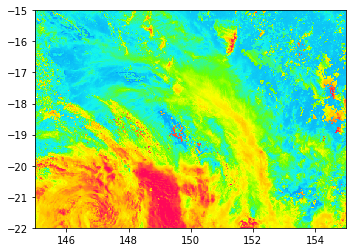

In [45]:
# 2017-03-28 
dates = time[6*24*21-21:6*24*27-21:24*6-3]
print(dates)
images = []

for date in dates:
    
    img = wms.getmap(layers=[layer],
                    srs=crs[2],
                    bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                    size=(512, 512), 
                    format='image/png',
                    time=date
                    )
    im = Image.open(img)
    images.append(im)
    im.save('gsky_getMap%.19s.png' % date)
    
    imgplot = plt.imshow(im,extent=[subset_bbox[0], subset_bbox[2], subset_bbox[1], subset_bbox[3]])
    
    
images[0].save('cyclone_Debbie.gif',save_all=True, append_images=images[1:],optimize=False,duration=100,loop=0)

Another way to make GIF is using https://giphy.com/create/gifmaker, where you can upload all .png files, and create a fancier GIF.

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>

* http://www.opengeospatial.org/standards/wms <br/>
* https://geopython.github.io/OWSLib/#wms <br/>
